In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.optimize import curve_fit
import datetime

## Read the file

In [2]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, ion4_top, \
    ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, ion6_raw, ion6_bottom, \
    ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

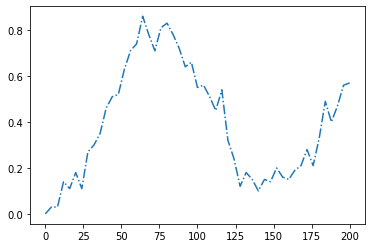

In [4]:
x, prob = readFile('time_scan_counter_prop_rfsoc_dressed_states_1_001')
plt.plot(x, prob, '-.')

In [5]:
import pandas as pd
df_data = pd.read_excel('data.xlsx')
df_data

Frequency (MHz)                                            state 0  \
0         190.6609  time_scan_counter_prop_rfsoc_dressed_states_1_001   
1         190.7034  time_scan_counter_prop_rfsoc_dressed_states_1_005   
2         190.7387  time_scan_counter_prop_rfsoc_dressed_states_1_009   
3         198.4707  time_scan_counter_prop_rfsoc_dressed_states_1_013   
4         198.5101  time_scan_counter_prop_rfsoc_dressed_states_1_017   
5         198.5500  time_scan_counter_prop_rfsoc_dressed_states_1_021   
6         206.2788  time_scan_counter_prop_rfsoc_dressed_states_1_025   
7         206.3215  time_scan_counter_prop_rfsoc_dressed_states_1_029   
8         206.3570  time_scan_counter_prop_rfsoc_dressed_states_1_033   

                                             state 1  \
0  time_scan_counter_prop_rfsoc_dressed_states_1_002   
1  time_scan_counter_prop_rfsoc_dressed_states_1_006   
2  time_scan_counter_prop_rfsoc_dressed_states_1_010   
3  time_scan_counter_prop_rfsoc_dressed_states_1_014   
4  time_scan_counter_prop_rfsoc_dressed_states_1_018   
5  time_scan_counter_prop_rfsoc_dressed_states_1_022   
6  time_scan_counter_prop_rfsoc_dressed_states_1_026   
7  time_scan_counter_prop_rfsoc_dressed_states_1_030   
8  time_scan_counter_prop_rfsoc_dressed_states_1_034   

                                             state 2  \
0  time_scan_counter_prop_rfsoc_dressed_states_1_003   
1  time_scan_counter_prop_rfsoc_dressed_states_1_007   
2  time_scan_counter_prop_rfsoc_dressed_states_1_011   
3  time_scan_counter_prop_rfsoc_dressed_states_1_015   
4  time_scan_counter_prop_rfsoc_dressed_states_1_019   
5  time_scan_counter_prop_rfsoc_dressed_states_1_023   
6  time_scan_counter_prop_rfsoc_dressed_states_1_027   
7  time_scan_counter_prop_rfsoc_dressed_states_1_031   
8  time_scan_counter_prop_rfsoc_dressed_states_1_035   

                                             state 3  
0  time_scan_counter_prop_rfsoc_dressed_states_1_004  
1  time_scan_counter_prop_rfsoc_dressed_states_1_008  
2  time_scan_counter_prop_rfsoc_dressed_states_1_012  
3  time_scan_counter_prop_rfsoc_dressed_states_1_016  
4  time_scan_counter_prop_rfsoc_dressed_states_1_020  
5  time_scan_counter_prop_rfsoc_dressed_states_1_024  
6  time_scan_counter_prop_rfsoc_dressed_states_1_028  
7  time_scan_counter_prop_rfsoc_dressed_states_1_032  
8  time_scan_counter_prop_rfsoc_dressed_states_1_036

In [6]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

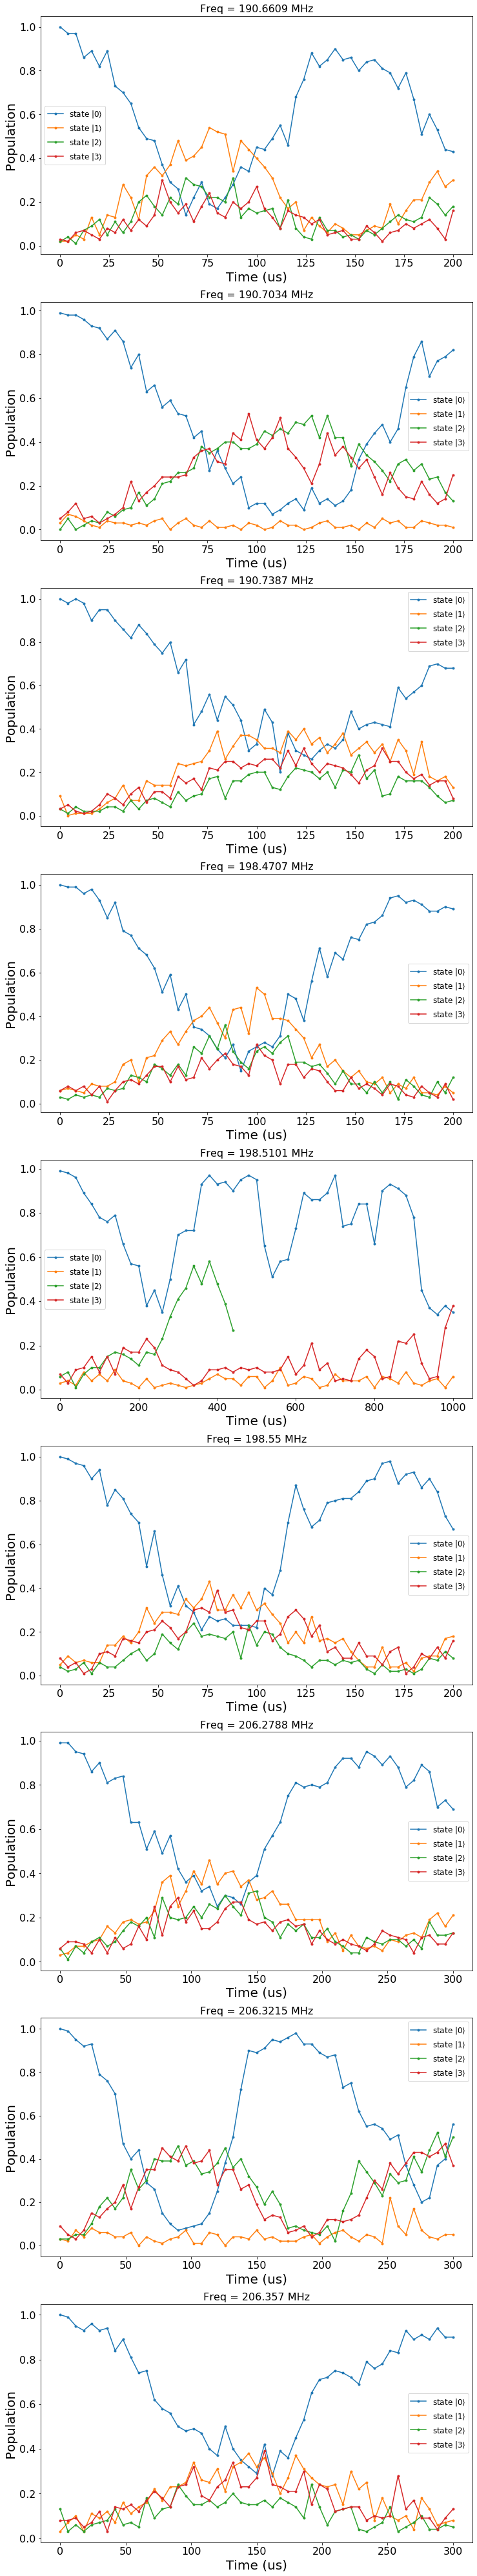

In [30]:
num = len(df_data.index)
plt.figure(figsize = [12,8*num])
for i in range(len(df_data.index)):
    x0, Prob0_inv = readFile(df_data['state 0'][i])
    x1, Prob1_inv = readFile(df_data['state 1'][i])
    x2, Prob2_inv = readFile(df_data['state 2'][i])
    x3, Prob3_inv = readFile(df_data['state 3'][i])
    plt.subplot(num, 1, i+1)
    plt.plot(x0, 1-Prob0_inv, '.-', label = r'state $|0\rightangle$')
    plt.plot(x1, 1-Prob1_inv, '.-', label = r'state $|1\rightangle$')
    plt.plot(x2, 1-Prob2_inv, '.-', label = r'state $|2\rightangle$')
    plt.plot(x3, 1-Prob3_inv, '.-', label = r'state $|3\rightangle$')
    plt.legend()
    plt.xlabel('Time (us)')
    plt.ylabel('Population')
    plt.title('Freq = '+str(df_data['Frequency (MHz)'][i])+' MHz')
plt.savefig("Time_evolution.png")

In [11]:
Rs = []
for i in range(len(df_data.index)):
    x0, Prob0_inv = readFile(df_data['state 0'][i])
    x1, Prob1_inv = readFile(df_data['state 1'][i])
    x2, Prob2_inv = readFile(df_data['state 2'][i])
    x3, Prob3_inv = readFile(df_data['state 3'][i])
    P1 = sum(1-Prob1_inv)
    P2 = sum(1-Prob2_inv)
    P3 = sum(1-Prob3_inv)
    P = P1+P2+P3
    [r1, r2, r3] = [P1/P, P2/P, P3/P]
    Rs.append([r1, r2, r3])

In [12]:
Rs

[[0.48449772633319554, 0.28110789582472095, 0.23439437784208353],
 [0.044460380064539284, 0.5012549300824668, 0.4542846898529939],
 [0.444945509207065, 0.2303645246148065, 0.3246899661781286],
 [0.46, 0.29702127659574457, 0.24297872340425544],
 [0.1505454545454546, 0.4123636363636364, 0.4370909090909091],
 [0.41974210760337927, 0.2125389061805247, 0.36771898621609606],
 [0.4183087027914615, 0.3033661740558293, 0.2783251231527093],
 [0.08242721851981762, 0.4731673097158892, 0.4444054717642931],
 [0.40831600831600834, 0.23492723492723486, 0.3567567567567567]]

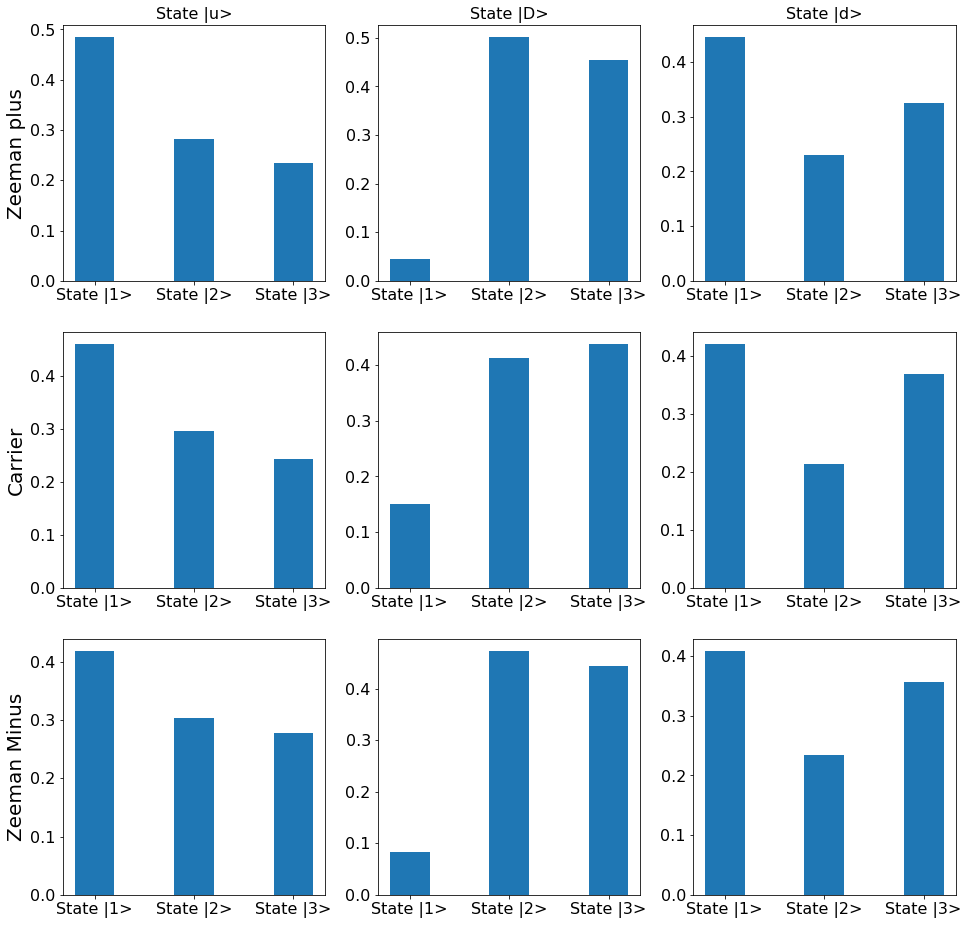

In [25]:
states = ['State |1>', 'State |2>', 'State |3>']
plt.figure(figsize = (16,16))
for i in range(len(Rs)):
    plt.subplot(3,3,i+1)
    plt.bar(states, Rs[i], width = 0.4)
    if i == 0:
        plt.title('State |u>')
        plt.ylabel('Zeeman plus')
    if i == 1:
        plt.title('State |D>')
    if i == 2:
        plt.title('State |d>')
    if i == 3:
        plt.ylabel('Carrier')
    if i == 6:
        plt.ylabel('Zeeman Minus')
plt.savefig("dressed_states.png")

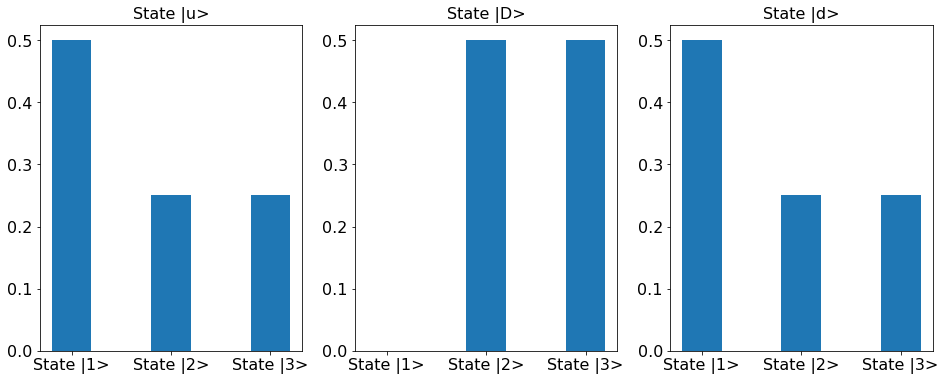

In [31]:
states = ['State |1>', 'State |2>', 'State |3>']
plt.figure(figsize = (16,6))
R_ideal = [[1/2, 1/4, 1/4], [0, 1/2, 1/2], [1/2, 1/4, 1/4]]
for i in range(len(R_ideal)):
    plt.subplot(1,3,i+1)
    plt.bar(states, R_ideal[i], width = 0.4)
    if i == 0:
        plt.title('State |u>')
    if i == 1:
        plt.title('State |D>')
    if i == 2:
        plt.title('State |d>')
plt.savefig("dressed_states_ideal.png")